# Financial News Sentiment Analysis

# Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Functions

In [4]:
def plotConfusionMatrix(y_true, y_pred, label_encoder, title):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

def modelEval(model_name, y_test, y_pred, label_encoder):
    accuracy = accuracy_score(y_test, y_pred)

    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)

    report_df = pd.DataFrame(report).transpose()

    print("="*50)
    print(f"{model_name} Evaluation")
    print("="*50)
    print(f"\nAccuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    display(report_df)  # 

# Data Pre-Processing

## Data Cleaning

In [5]:
fNewsDF = pd.read_csv('financial-news.csv', encoding='ISO-8859-1')  # Adjust encoding as needed

print( "Column Names:", fNewsDF.columns.tolist())
fNewsDF.head()

def cleanText(text):
    text = re.sub(r'<.*?>', '', text)  
    text = re.sub(r'\d+', '', text) 
    text = re.sub(r'[^\w\s]', '', text) 
    text = text.lower() 
    return text

fNewsDF = fNewsDF.dropna()
fNewsDF = fNewsDF.drop_duplicates()
fNewsDF['cleaned_text'] = fNewsDF['text'].apply(cleanText)

print( "Column Names:", fNewsDF.columns.tolist())
fNewsDF.head()

Column Names: ['sentiment', 'text']
Column Names: ['sentiment', 'text', 'cleaned_text']


,sentiment,text,cleaned_text
0,neutral,"According to Gran , the company has no plans t...",according to gran the company has no plans to...
1,neutral,Technopolis plans to develop in stages an area...,technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...,the international electronic industry company ...
3,positive,With the new production plant the company woul...,with the new production plant the company woul...
4,positive,According to the company 's updated strategy f...,according to the company s updated strategy fo...


## Label Encoding

In [6]:
labelEncoder = LabelEncoder()
fNewsDF['sentiment_encoded'] = labelEncoder.fit_transform(fNewsDF['sentiment'])  

fNewsDF.head()

,sentiment,text,cleaned_text,sentiment_encoded
0,neutral,"According to Gran , the company has no plans t...",according to gran the company has no plans to...,1
1,neutral,Technopolis plans to develop in stages an area...,technopolis plans to develop in stages an area...,1
2,negative,The international electronic industry company ...,the international electronic industry company ...,0
3,positive,With the new production plant the company woul...,with the new production plant the company woul...,2
4,positive,According to the company 's updated strategy f...,according to the company s updated strategy fo...,2


## Splitting Dataset

In [7]:
X_train, X_test, y_train, y_test = train_test_split(fNewsDF['cleaned_text'], fNewsDF['sentiment_encoded'], test_size=0.2, random_state=42)

## Feature Extraction

In [8]:
vectorizer = TfidfVectorizer(
    stop_words='english',  
    ngram_range=(1, 2),   
    max_df=0.9,            
    min_df=5,              
    sublinear_tf=True      
)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Model Training

## Naive Bayes

### Implementation

In [9]:
nbModel = MultinomialNB()
nbModel.fit(X_train_vectorized, y_train)

MultinomialNB()

### Evaluation Score and Classification Report

Naive Bayes Evaluation

Accuracy: 0.7128

Classification Report:


,precision,recall,f1-score,support
negative,0.750000,0.305085,0.433735,118.00000
neutral,0.712383,0.950266,0.814307,563.00000
positive,0.704142,0.414634,0.521930,287.00000
accuracy,0.712810,0.712810,0.712810,0.71281
macro avg,0.722175,0.556662,0.589991,968.00000
weighted avg,0.714525,0.712810,0.681229,968.00000


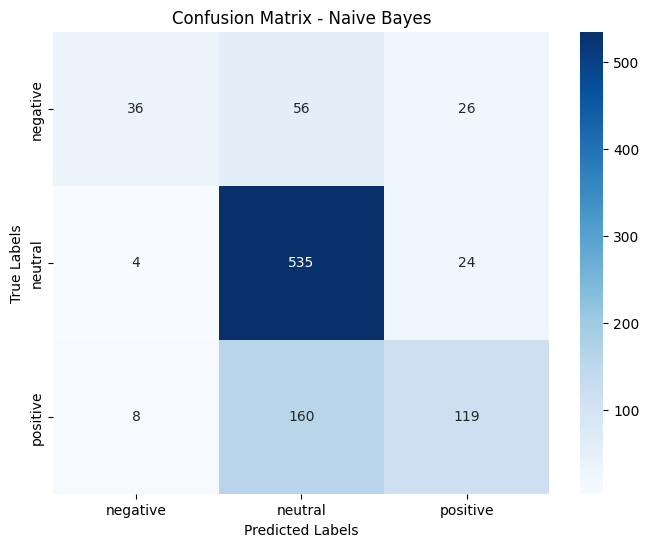

In [10]:
y_pred_Naive = nbModel.predict(X_test_vectorized)
modelEval("Naive Bayes", y_test, y_pred_Naive, labelEncoder)

plotConfusionMatrix(y_test, y_pred_Naive, labelEncoder, "Confusion Matrix - Naive Bayes")

## Random Forest Classifier

### Implementation

In [11]:
rfModel = RandomForestClassifier(n_estimators=100, random_state=42)
rfModel.fit(X_train_vectorized, y_train)


RandomForestClassifier(random_state=42)

### Evaluation Score and Classification Report

Random Forest Classifier Evaluation

Accuracy: 0.7479

Classification Report:


,precision,recall,f1-score,support
negative,0.671233,0.415254,0.513089,118.000000
neutral,0.757225,0.930728,0.835060,563.000000
positive,0.743842,0.526132,0.616327,287.000000
accuracy,0.747934,0.747934,0.747934,0.747934
macro avg,0.724100,0.624038,0.654825,968.000000
weighted avg,0.742775,0.747934,0.730960,968.000000


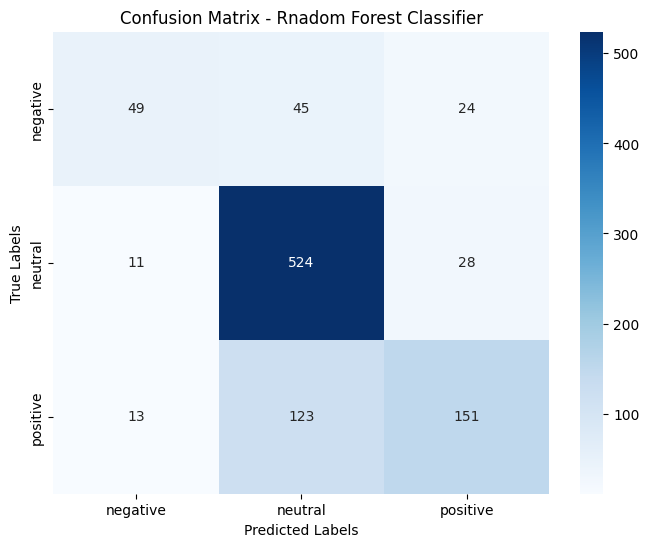

In [12]:
y_pred_rf = rfModel.predict(X_test_vectorized)

modelEval("Random Forest Classifier", y_test, y_pred_rf, labelEncoder)

plotConfusionMatrix(y_test, y_pred_rf, labelEncoder, "Confusion Matrix - Rnadom Forest Classifier")

## Support Vector Machines

### Implementation

In [13]:
svmModel = SVC(kernel='linear')
svmModel.fit(X_train_vectorized, y_train)

SVC(kernel='linear')

### Evaluation Score and Classification Report

Support Vector Machine (SVM) Evaluation

Accuracy: 0.7645

Classification Report:


,precision,recall,f1-score,support
negative,0.753086,0.516949,0.613065,118.000000
neutral,0.764877,0.936057,0.841853,563.000000
positive,0.767677,0.529617,0.626804,287.000000
accuracy,0.764463,0.764463,0.764463,0.764463
macro avg,0.761880,0.660874,0.693907,968.000000
weighted avg,0.764270,0.764463,0.750204,968.000000


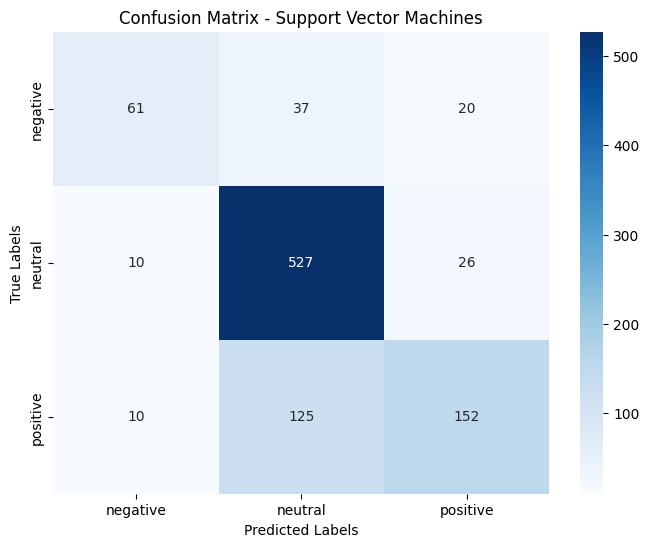

In [14]:
y_pred_svm = svmModel.predict(X_test_vectorized)

modelEval("Support Vector Machine (SVM)", y_test, y_pred_svm, labelEncoder)

plotConfusionMatrix(y_test, y_pred_svm, labelEncoder, "Confusion Matrix - Support Vector Machines")

# Fine Tuning Random Forest Classifier

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


param_dist = {
    'n_estimators': [50, 100, 300, 500, 700],             
    'max_depth': [5, 10, 20, 30, 40],                  
    'min_samples_split': [2, 5, 10, 15, 20, 25],        
    'min_samples_leaf': [1, 2, 3, 4, 5, 6],
    'max_features': ['sqrt'],
    'criterion': ['entropy'],
    'bootstrap': [True, False],
}

rf = RandomForestClassifier(random_state=1032)
gridSearch = GridSearchCV(estimator=rf, param_grid=param_dist, cv=5, n_jobs=-1)

gridSearch.fit(X_train_vectorized, y_train)
best_params = gridSearch.best_params_
bestRF = gridSearch.best_estimator_

y_pred_fine = bestRF.predict(X_test_vectorized)
acc=accuracy_score(y_test, y_pred_fine)
print(acc)

0.7396694214876033


Random Forest Classifier Evaluation

Accuracy: 0.7397

Classification Report:


,precision,recall,f1-score,support
negative,0.786885,0.406780,0.536313,118.000000
neutral,0.716146,0.976909,0.826446,563.000000
positive,0.848921,0.411150,0.553991,287.000000
accuracy,0.739669,0.739669,0.739669,0.739669
macro avg,0.783984,0.598280,0.638917,968.000000
weighted avg,0.764135,0.739669,0.710299,968.000000


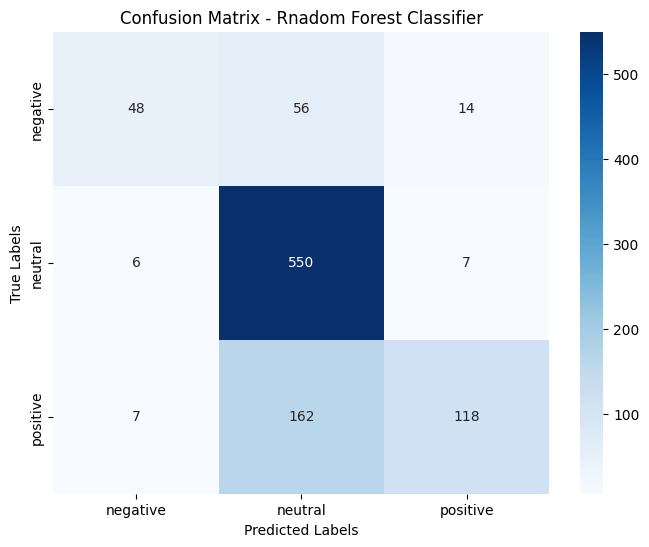

In [11]:
modelEval("Random Forest Classifier", y_test, y_pred_fine, labelEncoder)

plotConfusionMatrix(y_test, y_pred_fine, labelEncoder, "Confusion Matrix - Rnadom Forest Classifier")

# Comparing Models & Visualization

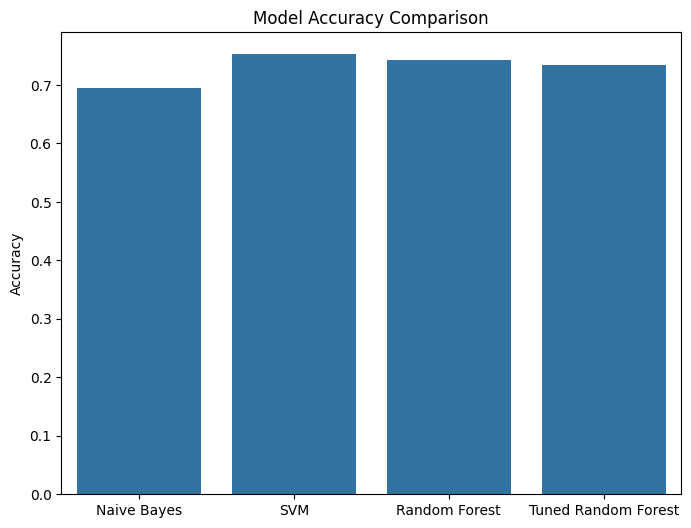

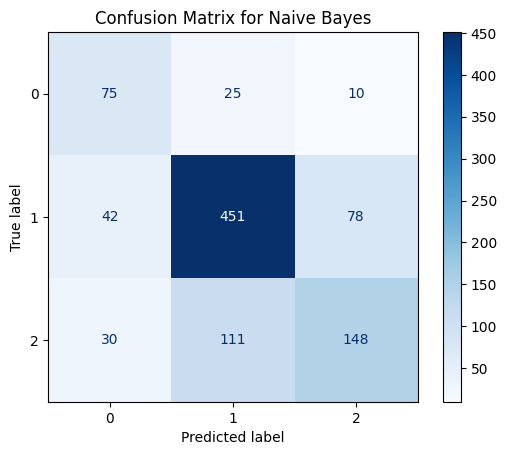

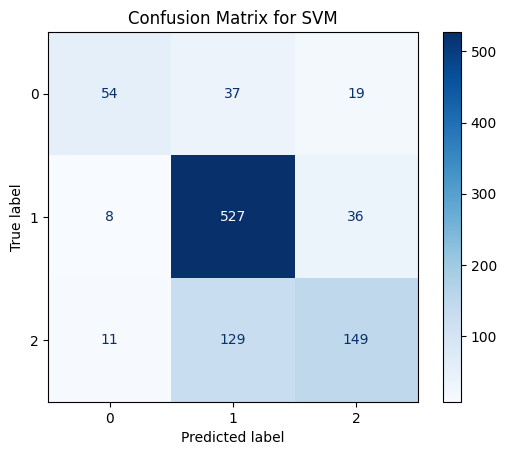

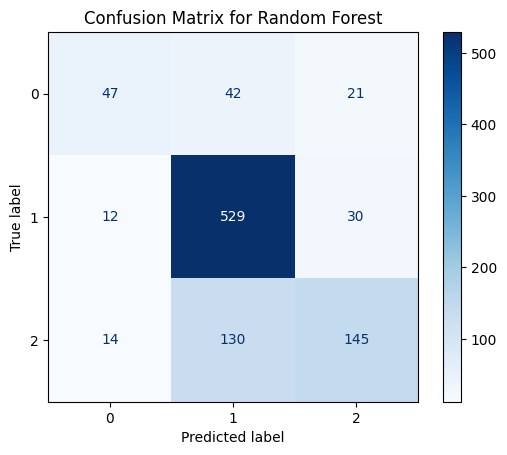

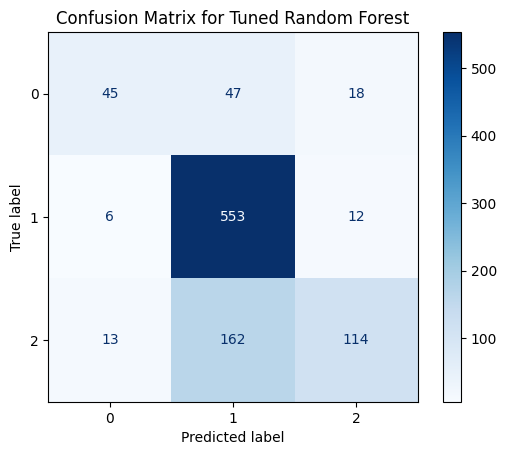

In [ ]:
# Calculate accuracy for each model
accuracies = {
    'Naive Bayes': accuracy_score(y_test, y_pred_Naive),
    'SVM': accuracy_score(y_test, y_pred_svm),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'Tuned Random Forest': accuracy_score(y_test, y_pred_fine)
}

# Plot accuracy comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# Plot confusion matrix for each model
models = ['Naive Bayes', 'SVM', 'Random Forest', 'Tuned Random Forest']
predictions = [y_pred_Naive, y_pred_svm, y_pred_rf, y_pred_fine]

for model, pred in zip(models, predictions):
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {model}')
    plt.show()
